<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/bell2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

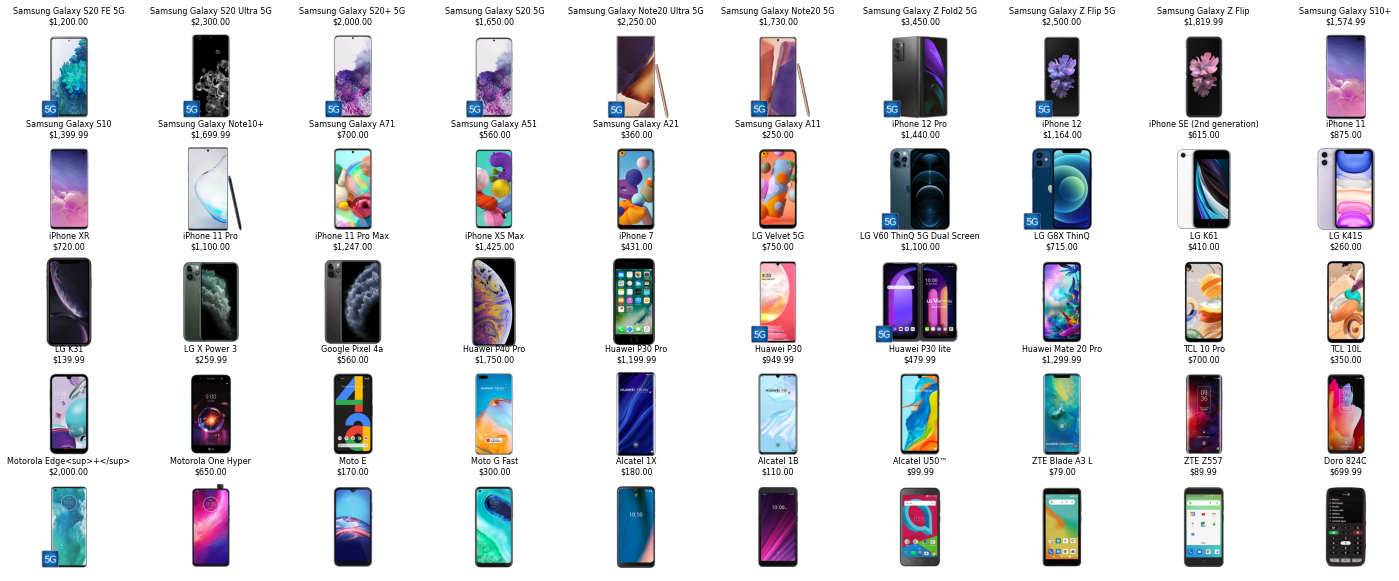

In [52]:
#Important components to read html for web scraping
import requests
import bs4          

#Essential components to show devices from png files 
import matplotlib.pyplot as plt
import matplotlib.image as img 

#Necessary import to see progress, avoid server error 
from tqdm.notebook import tqdm
from time import sleep

#importing Bell's latest devices offer in html format
bell_url="https://www.bell.ca/Mobility/Smartphones_and_mobile_internet_devices"
soup = bs4.BeautifulSoup(requests.get(bell_url).text,"lxml")

#Data wrangling for names and images, prepaid excluded - WITHOUT DICT COMP
# dlist=[]
# glist=[]
# for postpaid in soup.select('.dl-tile-img'):
#     if "Prepaid" not in str(postpaid):
#         dlist+=[postpaid.get('alt')]
#         glist+=[("https://www.bell.ca/"+str(postpaid.get('data-src')))]        

#WITH DICT COMP, dlist and glist replaced by dgdic
dgdic={postpaid.get('alt') : \
       "https://www.bell.ca/"+str(postpaid.get('data-src')) \
       for postpaid in soup.select('.dl-tile-img') \
       if 'Prepaid' not in str(postpaid)}

#Data wrangling for the prices, no prepaid anymore here        
plist=[]
plist += [prices.find(class_='qc').text.strip('\r\n ')\
    for prices in soup.select(".dl-tile-full-price")]

#Combining name/image/prices with Pyplot Subplots        
fig = plt.figure(figsize=(25,10))
for i in tqdm(range(1,len(dgdic)+1)):
    plt.subplot(5,10,i)
    plt.imshow(img.imread(list(dgdic.values())[i-1]))
    plt.title(list(dgdic.keys())[i-1]+'\n'+plist[i-1], fontsize=8)
    plt.axis('off')    